In [10]:
import matplotlib.pyplot as plt
import numpy as np
import json

import matplotlib as mpl

In [11]:
with open('results/evaluate_wang_scheme.json', 'r') as file:
    d_wang = json.load(file)
    
with open('results/evaluate_EQ4.json', 'r') as file:
    d_pysr_EQ4 = json.load(file)
    
with open('results/sfs_based_nn_6.json', 'r') as file:
    d_sfs = json.load(file)
    
with open('results/sfs_24_based_nn.json', 'r') as file:
    d_sfs_24 = json.load(file)

In [12]:
# Turn distributions into probability distributions
for reg in range(0, 4):
    d_wang['Preds_reg_%d_x'%reg] = d_wang['Preds_reg_%d_x'%reg]/(100*np.mean(d_wang['Preds_reg_%d_x'%reg]))
    d_pysr_EQ4['Preds_reg_%d_x'%reg] = d_pysr_EQ4['Preds_reg_%d_x'%reg]/(100*np.mean(d_pysr_EQ4['Preds_reg_%d_x'%reg]))
    d_sfs['Preds_sfs_6_reg_%d_x'%(reg+1)] = d_sfs['Preds_sfs_6_reg_%d_x'%(reg+1)]/(100*np.mean(d_sfs['Preds_sfs_6_reg_%d_x'%(reg+1)]))
    d_sfs_24['Preds_reg_%d_x'%reg] = d_sfs_24['Preds_reg_%d_x'%reg]/(100*np.mean(d_sfs_24['Preds_reg_%d_x'%reg]))
    d_wang['Data_reg_%d_x'%reg] = d_wang['Data_reg_%d_x'%reg]/(100*np.mean(d_wang['Data_reg_%d_x'%reg]))
    
print(100*np.mean(d_wang['Preds_reg_%d_x'%0]))
print(100*np.mean(d_sfs_24['Preds_reg_%d_x'%0]))

0.9999999999999999
1.0


**Plot MSE/R2 and Hellinger distances**

In [13]:
def hellinger(p,q):
    """Hellinger distance between distributions"""
    return sum([(np.sqrt(t[0])-np.sqrt(t[1]))*(np.sqrt(t[0])-np.sqrt(t[1])) for t in zip(p,q)])/np.sqrt(2.)

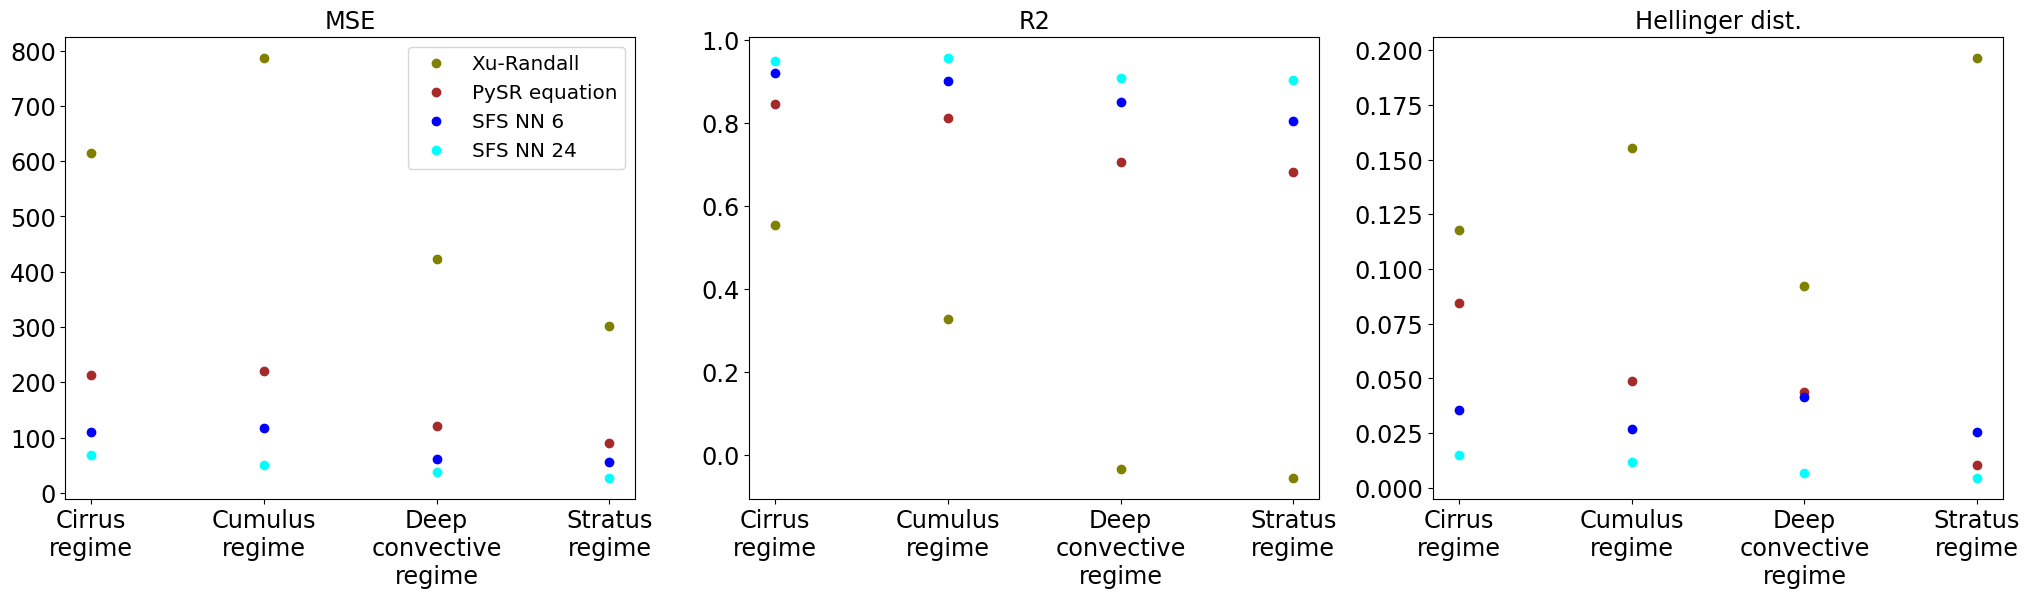

In [14]:
import matplotlib
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.titlesize'] = 'xx-large'
matplotlib.rcParams['axes.labelsize'] = 'xx-large' # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = 'xx-large'
matplotlib.rcParams['ytick.labelsize'] = 'xx-large'

plt.figure(figsize=(25, 6))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
# plt.suptitle("Selected schemes evaluated on cloud regimes", fontsize=18, y=.92)

feats = ['Cirrus\nregime', 'Cumulus\nregime', 'Deep\nconvective\nregime', 'Stratus\nregime']
plots = ['MSE', 'R2', 'Hellinger dist.']

hist_data = {}
hist_preds = {}

axes = (0,1,2)
for plot, par in enumerate(plots):
    # Add new subplot iteratively
    ax = plt.subplot(1, 3, plot + 1)
    
    # First subplot
    if par == 'MSE':
        wang_mse = {}; pysr_mse = {}; sfs_6_mse = {}; sfs_24_mse = {}
        for reg in range(1, 5):
            wang_mse['Wang reg %d'%reg] = d_wang['Regime %d MSE'%reg]
            pysr_mse['PySR 18 reg %d'%reg] = d_pysr_EQ4['Regime %d MSE'%reg]
            sfs_6_mse['SFS NN 6 reg %d'%reg] = d_sfs['SFS NN 6']['Regime %d MSE'%reg]
            sfs_24_mse['SFS NN 24 reg %d'%reg] = d_sfs_24['Regime %d MSE'%reg]

        ax.plot(feats, [wang_mse[key] for key in wang_mse.keys() if 'Wang' in key], 'o', color='olive')
        ax.plot(feats, [pysr_mse[key] for key in pysr_mse.keys() if 'PySR' in key], 'o', color='brown')
        ax.plot(feats, [sfs_6_mse[key] for key in sfs_6_mse.keys() if 'SFS NN 6' in key], 'o', color='blue')
        ax.plot(feats, [sfs_24_mse[key] for key in sfs_24_mse.keys() if 'SFS NN 24' in key], 'o', color='cyan')
        ax.legend(['Xu-Randall', 'PySR equation', 'SFS NN 6', 'SFS NN 24'])
        plt.title('MSE')
        
    # Second subplot
    if par == 'R2':
        wang_r2 = {}; pysr_r2 = {}; sfs_6_r2 = {}; sfs_24_r2 = {}
        for reg in range(1, 5):
            wang_r2['Wang reg %d'%reg] = d_wang['Regime %d R2'%reg]
            pysr_r2['PySR 18 reg %d'%reg] = d_pysr_EQ4['Regime %d R2'%reg]
            sfs_6_r2['SFS NN 6 reg %d'%reg] = d_sfs['SFS NN 6']['Regime %d R2'%reg]
            sfs_24_r2['SFS NN 24 reg %d'%reg] = d_sfs_24['Regime %d R2'%reg]

        ax.plot(feats, [wang_r2[key] for key in wang_r2.keys() if 'Wang' in key], 'o', color='olive')
        ax.plot(feats, [pysr_r2[key] for key in pysr_r2.keys() if 'PySR' in key], 'o', color='brown')
        ax.plot(feats, [sfs_6_r2[key] for key in sfs_6_r2.keys() if 'SFS NN 6' in key], 'o', color='blue')
        ax.plot(feats, [sfs_24_r2[key] for key in sfs_24_r2.keys() if 'SFS NN 24' in key], 'o', color='cyan')
        # ax.legend(['Xu-Randall', 'PySR EQ4', 'SFS NN 6', 'SFS NN 24'])
        plt.title('R2')
        
    # Third subplot
    if par == 'Hellinger dist.':
        wang_hel = {}; pysr_hel = {}; sfs_6_hel = {}; sfs_24_hel = {}
        for reg in range(4):
            wang_hel['Wang reg %d'%reg] = hellinger(d_wang['Preds_reg_%d_x'%reg], d_wang['Data_reg_%d_x'%reg])
            pysr_hel['PySR 18 reg %d'%reg] = hellinger(d_pysr_EQ4['Preds_reg_%d_x'%reg], d_wang['Data_reg_%d_x'%reg])
            sfs_6_hel['SFS NN 6 reg %d'%reg] = hellinger(d_sfs['Preds_sfs_6_reg_%d_x'%(reg+1)], d_wang['Data_reg_%d_x'%reg])
            sfs_24_hel['SFS NN 24 reg %d'%reg] = hellinger(d_sfs_24['Preds_reg_%d_x'%reg], d_wang['Data_reg_%d_x'%reg])

        ax.plot(feats, [wang_hel[key] for key in wang_hel.keys() if 'Wang' in key], 'o', color='olive')
        ax.plot(feats, [pysr_hel[key] for key in pysr_hel.keys() if 'PySR' in key], 'o', color='brown')
        ax.plot(feats, [sfs_6_hel[key] for key in sfs_6_hel.keys() if 'SFS NN 6' in key], 'o', color='blue')
        ax.plot(feats, [sfs_24_hel[key] for key in sfs_24_hel.keys() if 'SFS NN 24' in key], 'o', color='cyan')
        # ax.legend(['Xu-Randall', 'PySR EQ4', 'SFS NN 6', 'SFS NN 24'])
        plt.title('Hellinger dist.')
    
# plt.savefig('~/workspace_icon-ml/symbolic_regression/evaluate_schemes/on_isccp_regimes/results/performance_metrics_selected_schemes_pd.pdf', bbox_inches='tight')

In [46]:
np.log(0.22)

-1.5141277326297755

In [48]:
d_wang['Preds_reg_%d_x'%reg]

array([1.36936120e-08, 4.10808361e-08, 1.09548896e-07, 3.14953077e-07,
       4.10808361e-07, 7.39455050e-07, 1.02702090e-06, 1.72539512e-06,
       2.16359070e-06, 3.24538605e-06, 4.43673030e-06, 6.09365736e-06,
       7.73689080e-06, 9.68138371e-06, 1.23379444e-05, 1.47754074e-05,
       1.75825979e-05, 2.34845446e-05, 2.75378538e-05, 3.10981929e-05,
       3.81504031e-05, 4.50656772e-05, 5.14469004e-05, 6.22511603e-05,
       7.03166978e-05, 8.04499707e-05, 9.38012425e-05, 1.08097373e-04,
       1.23571155e-04, 1.40181506e-04, 1.55326641e-04, 1.75237153e-04,
       1.99557008e-04, 2.25314692e-04, 2.44800702e-04, 2.74762326e-04,
       3.00711720e-04, 3.31138926e-04, 3.59936592e-04, 3.95745388e-04,
       4.25405752e-04, 4.70211250e-04, 5.05965271e-04, 5.49113843e-04,
       5.93385290e-04, 6.38450968e-04, 6.87830133e-04, 7.44850333e-04,
       8.07128881e-04, 8.69229411e-04, 9.47050209e-04, 1.02844504e-03,
       1.12493023e-03, 1.22122371e-03, 1.34326118e-03, 1.48379872e-03,
      

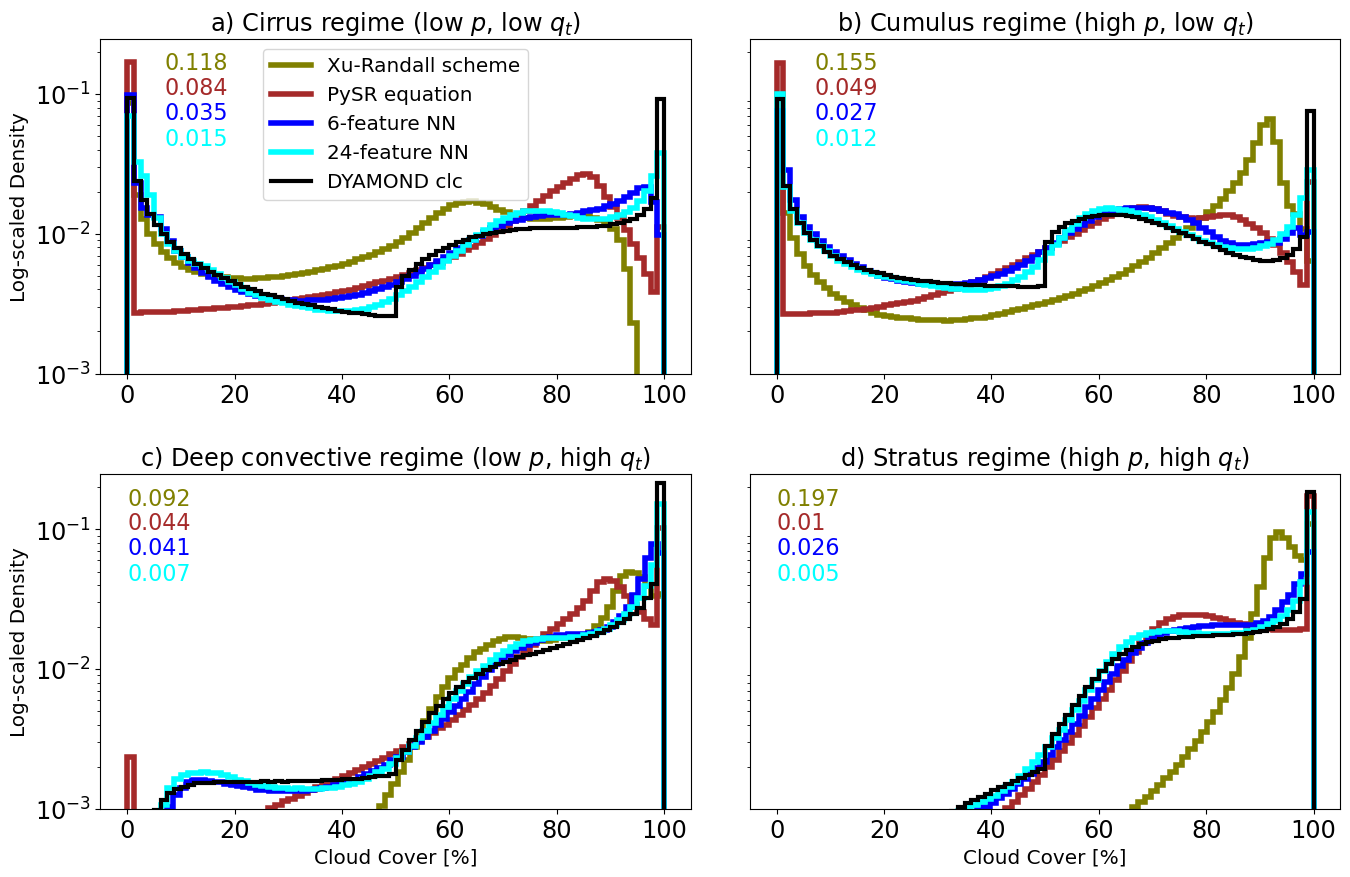

In [66]:
# Increase the general font size
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'x-large' # For an axes xlabel and ylabel
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'xx-large'
mpl.rcParams['ytick.labelsize'] = 'xx-large'

plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.1)
# plt.suptitle("Selected schemes evaluated on cloud regimes", fontsize=18, y=.92)

plot_titles = ['a) Cirrus regime (low $p$, low $q_t$)', 'b) Cumulus regime (high $p$, low $q_t$)', \
               'c) Deep convective regime (low $p$, high $q_t$)', 'd) Stratus regime (high $p$, high $q_t$)']

# # Add hellinger scores from two cells later?
# wang_hel = np.round(np.array(list(wang_hel.values())), 3)
# pysr_hel = np.round(np.array(list(pysr_hel.values())), 3)
# sfs_6_hel = np.round(np.array(list(sfs_6_hel.values())), 3)
# sfs_24_hel = np.round(np.array(list(sfs_24_hel.values())), 3)

axes = tuple(np.arange(len(plot_titles)))
for reg, title_name in enumerate(plot_titles):
    # Add new subplot iteratively
    ax = plt.subplot(2, 2, reg + 1)
    axis = axes[:reg] + axes[(reg+1):]
    
    plt.title(title_name)

    plt.stairs(d_wang['Preds_reg_%d_x'%reg], d_wang['Preds_reg_%d_y'%reg], linewidth=4, color='olive')
    plt.stairs(d_pysr_EQ4['Preds_reg_%d_x'%reg], d_pysr_EQ4['Preds_reg_%d_y'%reg], linewidth=4, color='brown')
    plt.stairs(d_sfs['Preds_sfs_6_reg_%d_x'%(reg+1)], d_sfs['Preds_sfs_6_reg_%d_y'%(reg+1)], linewidth=4, color='blue')
    plt.stairs(d_sfs_24['Preds_reg_%d_x'%reg], d_sfs_24['Preds_reg_%d_y'%reg], linewidth=4, color='cyan')
    plt.stairs(d_wang['Data_reg_%d_x'%reg], d_wang['Data_reg_%d_y'%reg], linewidth=3, color='black')
    
    plt.yscale('log')
    plt.ylim([0.001, 0.25])
    # plt.ylim((0, 0.25))
    
    if reg in [0, 1]:
        x_ind = 7
    else:
        x_ind = 0
    plt.rc('font', size=16)
    plt.text(x_ind, 0.22 - 0.07, wang_hel[reg], color='olive')
    plt.text(x_ind, 0.2 - 0.1, pysr_hel[reg], color='brown')
    plt.text(x_ind, 0.18 - 0.114, sfs_6_hel[reg], color='blue')
    plt.text(x_ind, 0.16 - 0.117, sfs_24_hel[reg], color='cyan')
    plt.rc('font', size=10)
    
    if reg == 0:
        plt.legend(['Xu-Randall scheme', 'PySR equation', '6-feature NN', '24-feature NN', 'DYAMOND clc'], loc='upper center')
    # plt.ylim((0, 0.25))
    
    if reg in [1, 3]:
        plt.yticks(ticks=[])
        
    if reg in [2, 3]:
        plt.xlabel('Cloud Cover [%]')
        
    if reg in [0, 2]:
        plt.ylabel('Log-scaled Density')
    
# plt.savefig('distributions_selected_schemes_pd_logscaled.pdf')

**Hellinger distance between SFS_5_NN and the ground truth**

In [17]:
with open('results/sfs_based_nn_5.json', 'r') as file:
    d_sfs_5 = json.load(file)
    
# Turn distributions into probability distributions
for reg in range(0, 4):
    d_sfs_5['Preds_sfs_5_reg_%d_x'%(reg+1)] = d_sfs_5['Preds_sfs_5_reg_%d_x'%(reg+1)]/(100*np.mean(d_sfs_5['Preds_sfs_5_reg_%d_x'%(reg+1)]))
    
for reg in range(0, 4):
    print(hellinger(d_sfs_5['Preds_sfs_5_reg_%d_x'%(reg+1)], d_wang['Data_reg_%d_x'%reg]))

0.03843698814367164
0.03101502375330547
0.0428280100352833
0.01968638241863089
